In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
x_bp = pd.read_excel('X_bp.xlsx', index_col = 0)
x_nup = pd.read_excel('X_nup.xlsx', index_col = 0)
x_nup1=x_nup.tail(17)
df = x_nup.merge(x_bp, left_index = True, right_index = True, how = 'inner')
df = pd.concat([df,x_nup1],sort=False,axis=0)

In [3]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(strategy='median')
df=impute.fit_transform(df)
df = pd.DataFrame(data=df, columns=["Угол нашивки, град", "Шаг нашивки", "Плотность нашивки", "Соотношение матрица-наполнитель", "Плотность, кг/м3",
                                   "модуль упругости, ГПа","Количество отвердителя, м.%","Содержание эпоксидных групп,%_2","Температура вспышки, С_2 ",
                                    "Поверхностная плотность, г/м2","Модуль упругости при растяжении, ГПа", "Прочность при растяжении, МПа",
                                    "Потребление смолы, г/м2"])

In [4]:
X=df.drop(['Соотношение матрица-наполнитель'], axis=1)
y=df[['Соотношение матрица-наполнитель']]

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.3, random_state=5)

In [6]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam, RMSprop

In [7]:
normalizer = tf.keras.layers.Normalization(axis = -1)

In [8]:
def plot_loss(history):
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.ylim([0, 10])
    plt.xlabel('Эпоха')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid(True)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error
m = {}
m_col = ['mean_squared_error', 'mean_absolute_error', 'r2_score', 'mean_absolute_percentage_error']
def me(y_test, y_pred, model_name):
    
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = mean_absolute_percentage_error(y_test, y_pred)
    
    m[model_name] = [mse, mae, r2, mape]
    print (mse, mae, r2, mape)

In [10]:
def result(y_test, y_pred):
    plt.figure(figsize=(10, 5))
    plt.grid()
    plt.title(y_test.columns)
    plt.plot(np.array(y_test)[:100], label='Target')
    plt.plot(np.array(y_pred)[:100], label='Predict')
    plt.legend()

In [11]:
def nn_model1(normalizer):
    model1 = Sequential([
        normalizer,
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model1.compile(loss='mean_squared_error', optimizer='Adam')
    return model1

In [12]:
model1=nn_model1(normalizer)

history = model1.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

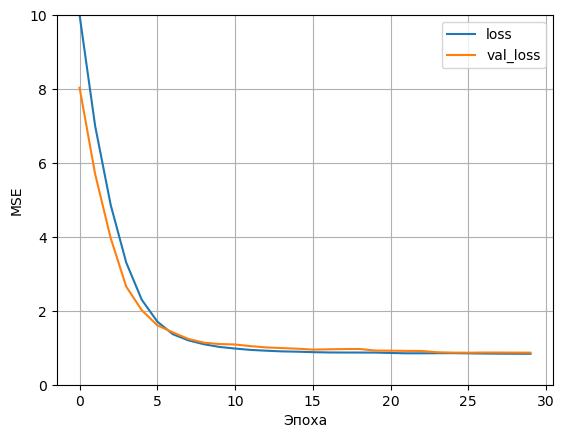

In [13]:
plot_loss(history)
plt.show()

In [14]:
y_pred1 = model1.predict(X_test)

10/10 [==============================] - 0s 6ms/step


In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization (Normalizatio  (None, 12)               25        
 n)                                                              
                                                                 
 dense (Dense)               (None, 10)                130       
                                                                 
 dense_1 (Dense)             (None, 10)                110       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 276
Trainable params: 251
Non-trainable params: 25
_________________________________________________________________


0.84114682580829 0.7321722561305065 -0.03134850994080507 0.3147098078923422


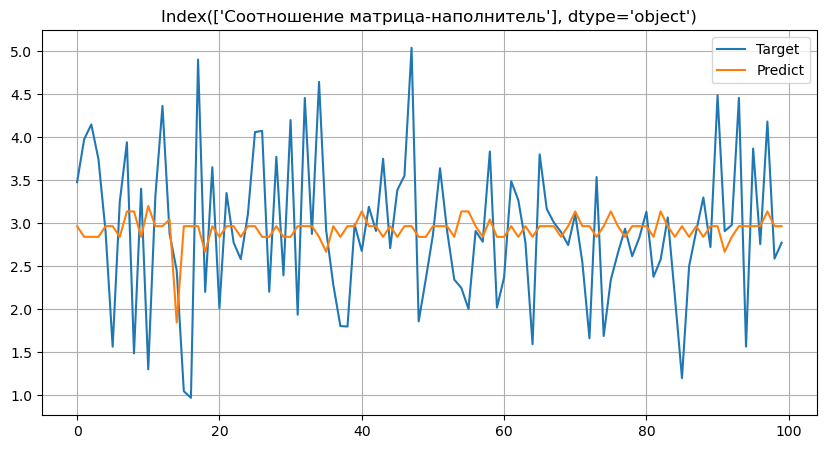

In [16]:
me(y_test, y_pred1, 'model1')
result(y_test, y_pred1)

изменим число нейронов в скрытых слоях

In [17]:
def nn_model2(normalizer):
    model2 = Sequential([
        normalizer,
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model2.compile(loss='mean_squared_error', optimizer='Adam')
    return model2

In [18]:
model2 = nn_model2(normalizer)
history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

In [19]:
y_pred2 = model2.predict(X_test)

10/10 [==============================] - 0s 7ms/step


0.8173226756175583 0.7228333195183668 -0.0021371986145024557 0.30670256836009874


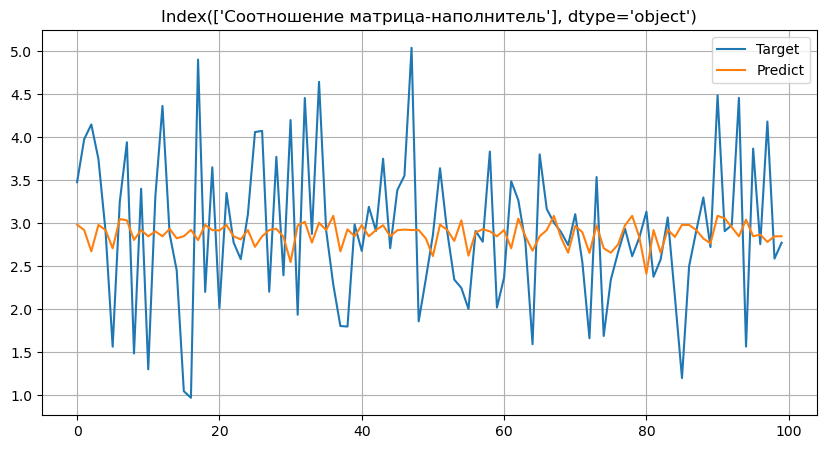

In [20]:
me(y_test, y_pred2, 'model2')
result(y_test, y_pred2)

In [21]:
def nn_model3(normalizer):
    model3 = Sequential([
        normalizer,
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(8, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model3.compile(loss='mean_squared_error', optimizer='Adam')
    return model3

In [22]:
model3 = nn_model3(normalizer)
history = model3.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)

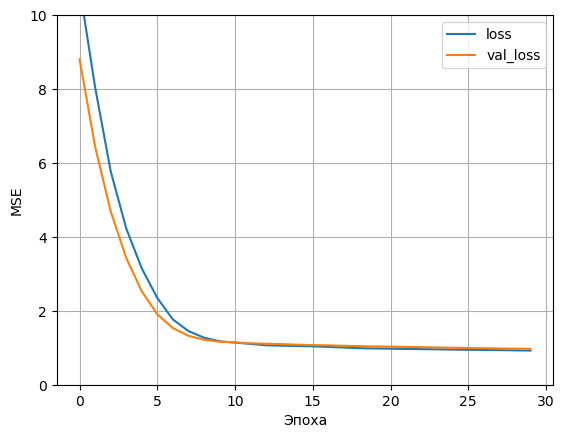

In [23]:
plot_loss(history)
plt.show()

10/10 [==============================] - 0s 3ms/step
0.9583997671723793 0.7708969195320485 -0.17511490440567745 0.3323775280423939


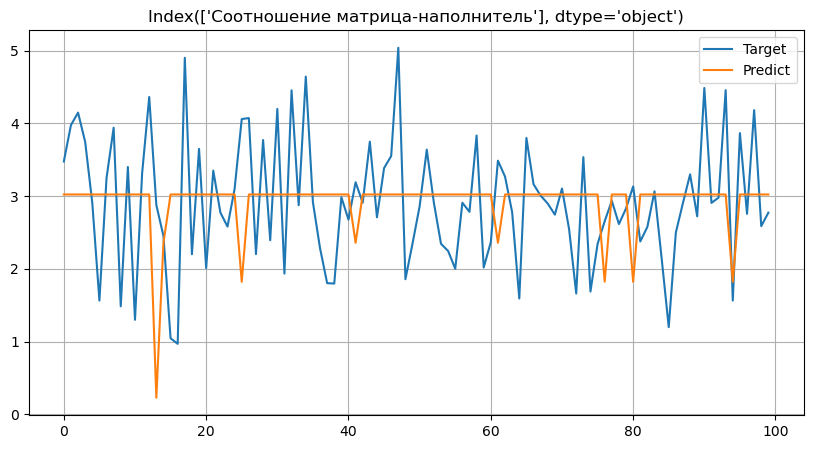

In [24]:
y_pred3 = model3.predict(X_test)
me(y_test, y_pred3, 'model3')
result(y_test, y_pred3)

Изменим функции активации

In [27]:
def nn_model4(normalizer):
    model4 = Sequential([
        normalizer,
        layers.Dense(64, activation = 'softmax'),
        layers.Dense(64, activation = 'softmax'),
        layers.Dense(1, activation = 'relu')
    ])
    
    model4.compile(loss='mean_squared_error', optimizer='Adam')
    return model4

10/10 [==============================] - 0s 5ms/step
9.28660315376422 2.9105022820435145 -10.386507124773026 1.0


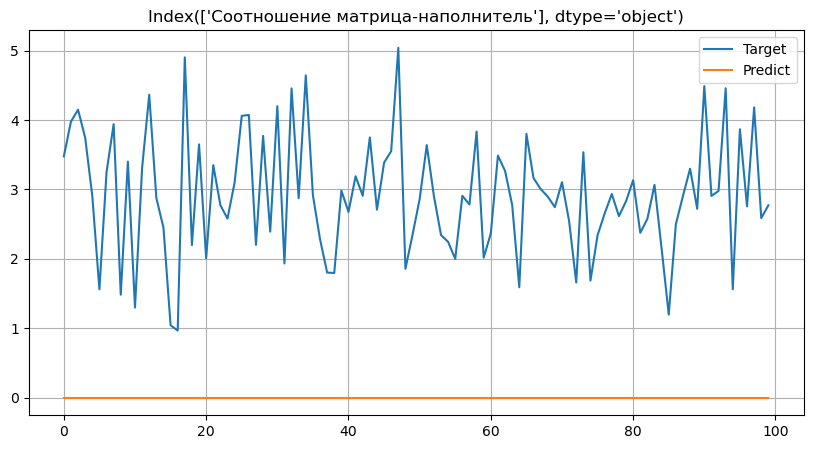

In [28]:
model4 = nn_model4(normalizer)
history = model4.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred4 = model4.predict(X_test)
me(y_test, y_pred4, 'model4')
result(y_test, y_pred4)

In [29]:
def nn_model5(normalizer):
    model5 = Sequential([
        normalizer,
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(64, activation = 'softmax'),
        layers.Dense(1, activation = 'relu')
    ])
    
    model5.compile(loss='mean_squared_error', optimizer='Adam')
    return model5

10/10 [==============================] - 0s 5ms/step
3.009229672441606 1.5078553803816097 -2.689682280807484 0.47469740292665574


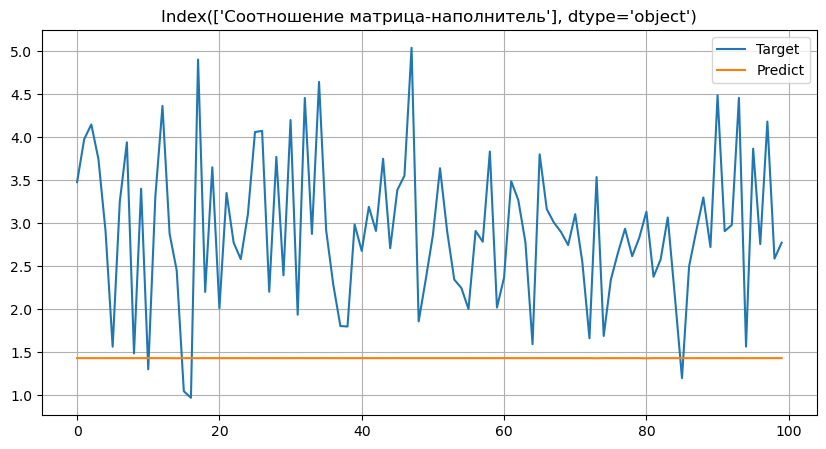

In [30]:
model5 = nn_model5(normalizer)
history = model5.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred5 = model5.predict(X_test)
me(y_test, y_pred5, 'model5')
result(y_test, y_pred5)

изменим число слоев

In [43]:
def nn_model7(normalizer):
    model7 = Sequential([
        normalizer,
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(10, activation = 'tanh'),
        layers.Dropout(0.01),
        layers.Dense(10, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model7.compile(loss='mean_squared_error', optimizer='Adam')
    return model7

10/10 [==============================] - 0s 5ms/step
0.8200768982226171 0.7255241125737587 -0.005514211155735138 0.31583049850939754


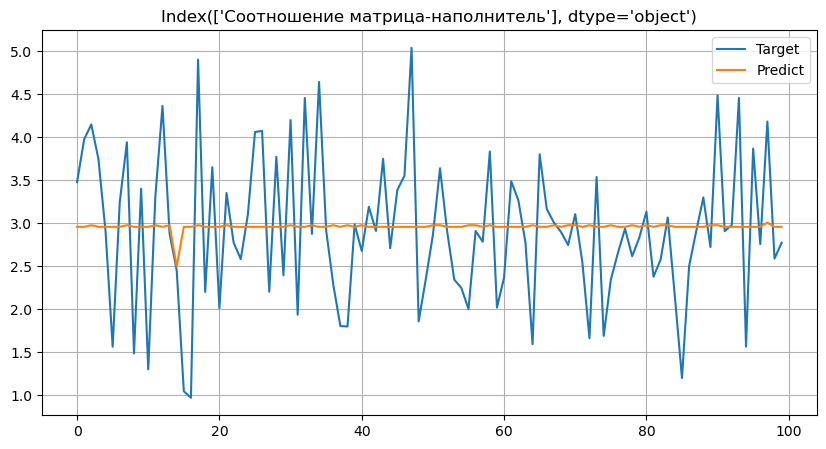

In [44]:
model7 = nn_model7(normalizer)
history = model7.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred7 = model7.predict(X_test)
me(y_test, y_pred7, 'model7')
result(y_test, y_pred7)

изменим оптимайзер

In [47]:
def nn_model9(normalizer):
    model9 = Sequential([
        normalizer,
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model9.compile(loss='mean_squared_error', optimizer='RMSprop')
    return model9

10/10 [==============================] - 0s 5ms/step
0.8242081743246397 0.7289810427032719 -0.010579659090916627 0.3146371009951468


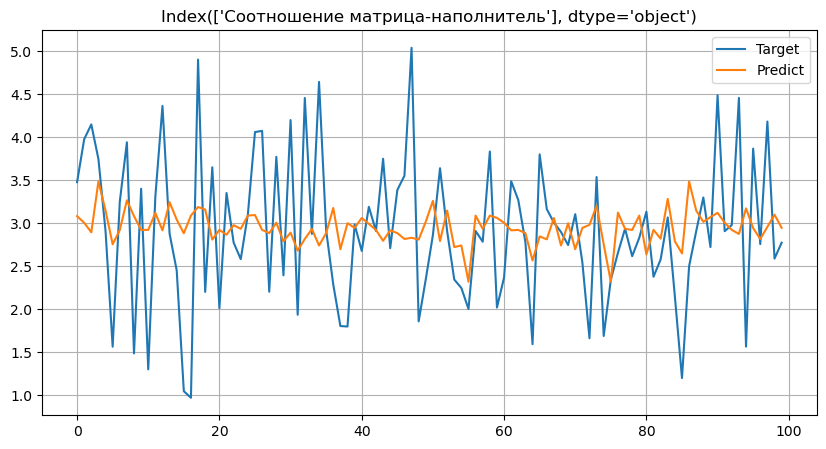

In [48]:
model9 = nn_model9(normalizer)
history = model9.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred9 = model9.predict(X_test)
me(y_test, y_pred9, 'model9')
result(y_test, y_pred9)

уберем нормалайзер

In [51]:
def nn_model10():
    model10 = Sequential([
        layers.Dense(13),
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model10.compile(loss='mean_squared_error', optimizer='Adam')
    return model10

10/10 [==============================] - 0s 3ms/step
0.8225850819904857 0.72921054585428 -0.008589550100470689 0.3172057322006795


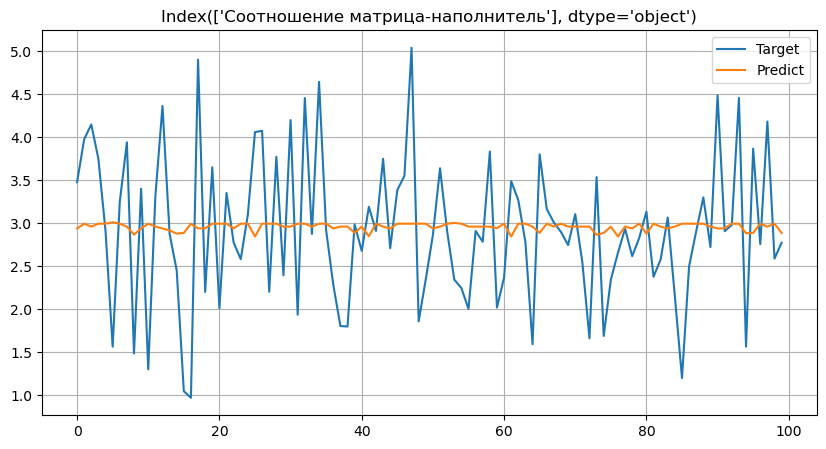

In [52]:
model10 = nn_model10()
history = model10.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=30)
y_pred10 = model10.predict(X_test)
me(y_test, y_pred10, 'model10')
result(y_test, y_pred10)

изменим число эпох обучения

10/10 [==============================] - 0s 5ms/step
0.8142619470770172 0.7229062144692611 0.0016156275542071885 0.31357688273416284


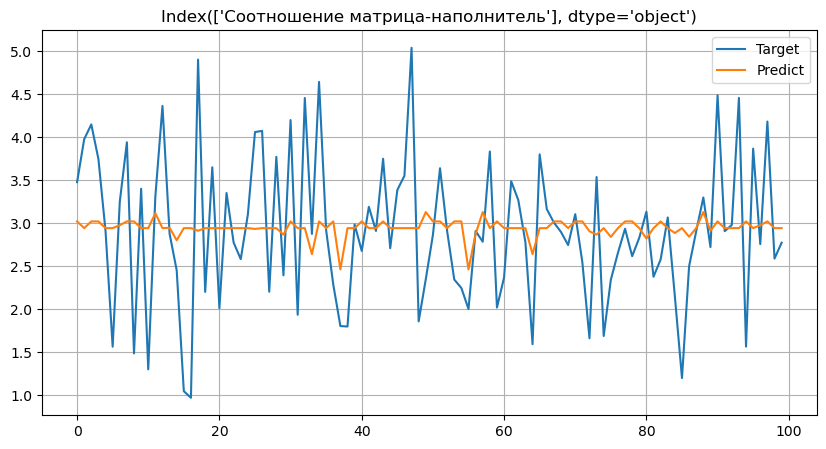

In [62]:
model8 = nn_model2(normalizer)
history = model2.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
y_pred8 = model2.predict(X_test)
me(y_test, y_pred8, 'model8')
result(y_test, y_pred8)

добавим слой дропаут

In [63]:
def nn_model6(normalizer):
    model6 = Sequential([
        normalizer,
        layers.Dense(64, activation = 'tanh'),
        layers.Dropout(0.1),
        layers.Dense(64, activation = 'tanh'),
        layers.Dense(1, activation = 'linear')
    ])
    
    model6.compile(loss='mean_squared_error', optimizer='Adam')
    return model6

10/10 [==============================] - 0s 4ms/step
0.8345045698663569 0.7342315237957185 -0.023204294735837294 0.320907437728212


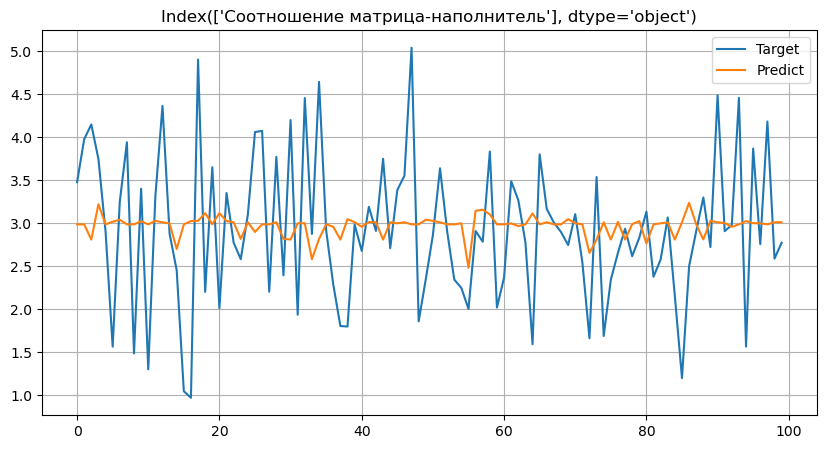

In [64]:
model6 = nn_model6(normalizer)
history = model6.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=100)
y_pred6 = model6.predict(X_test)
me(y_test, y_pred6, 'model6')
result(y_test, y_pred6)

10/10 [==============================] - 0s 5ms/step
0.8286250709005455 0.7259053433873893 -0.01599531253256825 0.3122595856194471


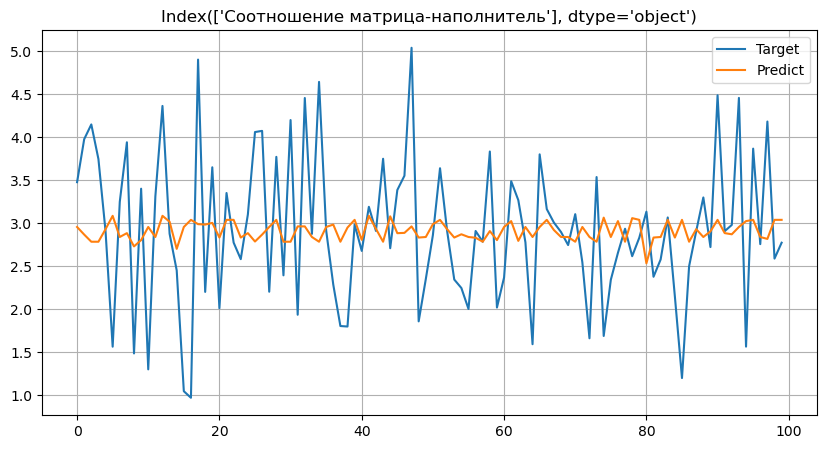

In [61]:
model11 = nn_model3(normalizer)
history = model11.fit(
    X_train,
    y_train,
    validation_split=0.2,
    verbose=0, epochs=120)
y_pred11 = model6.predict(X_test)
me(y_test, y_pred11, 'model11')
result(y_test, y_pred11)

In [65]:
df_metrics = pd.DataFrame(m, index=m_col).T.sort_values(by='r2_score')

In [67]:
df_metrics

,mean_squared_error,mean_absolute_error,r2_score,mean_absolute_percentage_error
model4,9.286603,2.910502,-10.386507,1.000000
model5,3.009230,1.507855,-2.689682,0.474697
model3,0.958400,0.770897,-0.175115,0.332378
model1,0.841147,0.732172,-0.031349,0.314710
model6,0.834505,0.734232,-0.023204,0.320907
model11,0.828625,0.725905,-0.015995,0.312260
model9,0.824208,0.728981,-0.010580,0.314637
model10,0.822585,0.729211,-0.008590,0.317206
model7,0.820077,0.725524,-0.005514,0.315830
model2,0.817323,0.722833,-0.002137,0.306703


# # Сохраняем модель с лучшим результатом

In [69]:
model2.save('bestNN')

INFO:tensorflow:Assets written to: bestNN\assets


INFO:tensorflow:Assets written to: bestNN\assets
